In [1]:
import os
import random
import time
import collections
import itertools
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle
import seaborn as sns

from IPython.display import HTML
from scipy.stats import entropy
from innvariant_dgl.dataset import graph_to_construction_sequence, construction_sequence_to_graph, construction_sequence_evolution
from tqdm import tqdm

In [2]:
def create_animation(seq: list) -> animation.FuncAnimation:
    evolution = construction_sequence_evolution(seq)

    def animate(i):
        ax.cla()
        g_t = evolution[i]
        nx.draw_circular(g_t, with_labels=True, ax=ax, node_color=['#FEBD69'] * g_t.number_of_nodes())

    fig, ax = plt.subplots()
    return animation.FuncAnimation(fig, animate, frames=len(evolution), interval=600)

In [3]:
with open('deepgg-combined.pkl', 'rb') as read_handle:
    C = pickle.load(read_handle)

In [4]:
keys = list(C.keys())
keys_dfs = [key for key in keys if '_dfs' in key]
keys_bfs = [key for key in keys if '_bfs' in key]
keys_process = [key for key in keys if '_process' in key]
keys_erdos_renyi = [key for key in keys if 'erdos_renyi' in key]
keys_barabasi_albert = [key for key in keys if 'barabasi_albert' in key]
keys_watts_strogatz = [key for key in keys if 'watts_strogatz' in key]
keys_er_and_bfs = [key for key in keys if 'erdos_renyi' in key and '_bfs' in key]
keys_er_and_dfs = [key for key in keys if 'erdos_renyi' in key and '_dfs' in key]
keys_ba_and_bfs = [key for key in keys if 'barabasi_albert' in key and '_bfs' in key]
keys_ba_and_dfs = [key for key in keys if 'barabasi_albert' in key and '_dfs' in key]
keys_ws_and_bfs = [key for key in keys if 'watts_strogatz' in key and '_bfs' in key]
keys_ws_and_dfs = [key for key in keys if 'watts_strogatz' in key and '_dfs' in key]

subsets = {
    'Depth-First-Search': keys_dfs,
    'Breadth-First-Search': keys_bfs,
    'Construction Process': keys_process,
    'Erdos-Renyi model': keys_erdos_renyi,
    'Barabasi-Albert model': keys_barabasi_albert,
    'Watts-Strogatz model': keys_watts_strogatz,
    'Erdos-Renyi + BFS': keys_er_and_bfs,
    'Erdos-Renyi + DFS': keys_er_and_dfs,
    'Barabasi-Albert + BFS': keys_ba_and_bfs,
    'Barabasi-Albert + DFS': keys_ba_and_dfs,
    'Watts-Strogatz + BFS': keys_ws_and_bfs,
    'Watts-Strogatz + DFS': keys_ws_and_dfs,
}

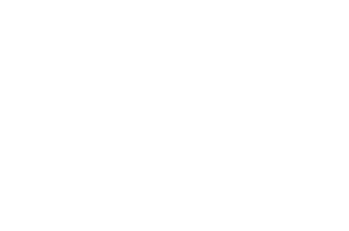

In [5]:
cs = C[keys_barabasi_albert[0]]['generated_cs'][0]
anim = create_animation(cs)
#HTML(anim.to_jshtml())

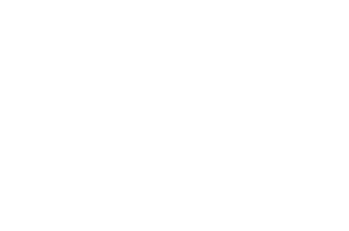

In [6]:
cs = C[keys_barabasi_albert[0]]['dataset_cs'][0]
anim = create_animation(cs)
#HTML(anim.to_jshtml())

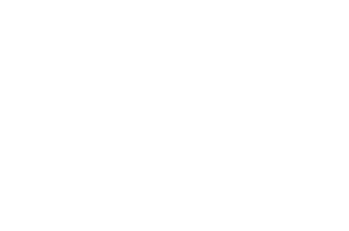

In [7]:
cs = C[keys_watts_strogatz[0]]['dataset_cs'][0]
anim = create_animation(cs)
#HTML(anim.to_jshtml())

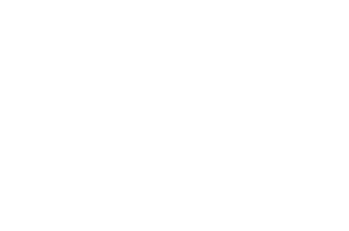

In [8]:
cs = C[keys_watts_strogatz[0]]['generated_cs'][0]
anim = create_animation(cs)
#HTML(anim.to_jshtml())